In [1]:
%run 'genlib.ipynb'

import rootpy.ROOT as R
R.gROOT.SetBatch(True)
from rootpy.io import root_open, DoesNotExist
import numpy as np
from rootpy.plotting import Canvas, Hist, Legend

dedx_gen = Bischel(  )
tof_gen = TofGen( )

0.00280428627167
1.11521617048


In [5]:
c = R.TChain( "rcpPicoDst" )
c.Add( "~/bnl/local/data/RcpAnalysis/data/RcpPicoDst/*1.root" )

11

In [6]:
hDedx = R.TH2F( "hDedx", " ;p [GeV/c]; dE/dx", 40, 0, 2, 500, -4, 4 )
hBeta = R.TH2F( "hBeta", " ;p [GeV/c]; 1/#beta", 40, 0, 2, 500, -2, 2 )

In [9]:

hDedx.Reset()
hBeta.Reset()

for event in range( 0, c.GetEntries() ) :
    c.GetEntry( event )
    
    for iTrack in range( 0, c.nTracks ) :
        if c.matchFlag[ iTrack ] < 1 :
            continue
        p = c.pP[ iTrack ]
        dedx = c.dedx[ iTrack ] / 1000.0
        zd = np.log(dedx) - np.log(dedx_gen.mean( "K", p )*1000)
        beta = c.beta[ iTrack ] / 20000.0
        if beta > 0 :
            zb = 1.0 / beta - tof_gen.mean( "K", p )
        else :
            zb = -99
        
        hDedx.Fill( p, zd )
        
        if zd < 0.035 and zd > -0.35 :
            if beta > 0 :
                hBeta.Fill( p, zb )


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log


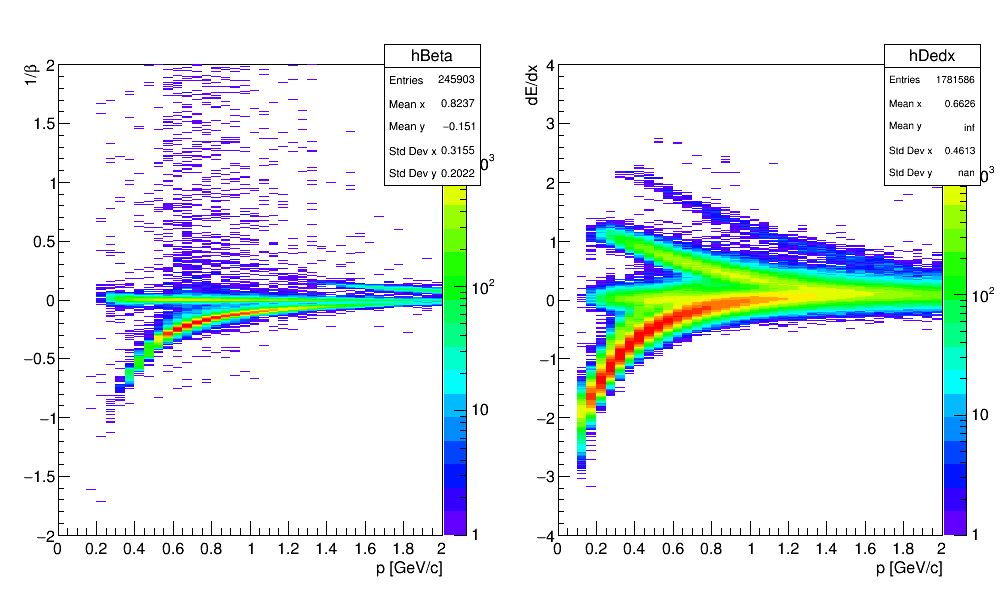

In [10]:
can = Canvas( width=1000, height=600 )
can.Divide( 2, 1 )

can.cd(1)
hBeta.Draw( "colz" )
R.gPad.SetLogz( 1 )
can.cd(2)
R.gPad.SetLogz( 1 )
hDedx.Draw("colz")
can

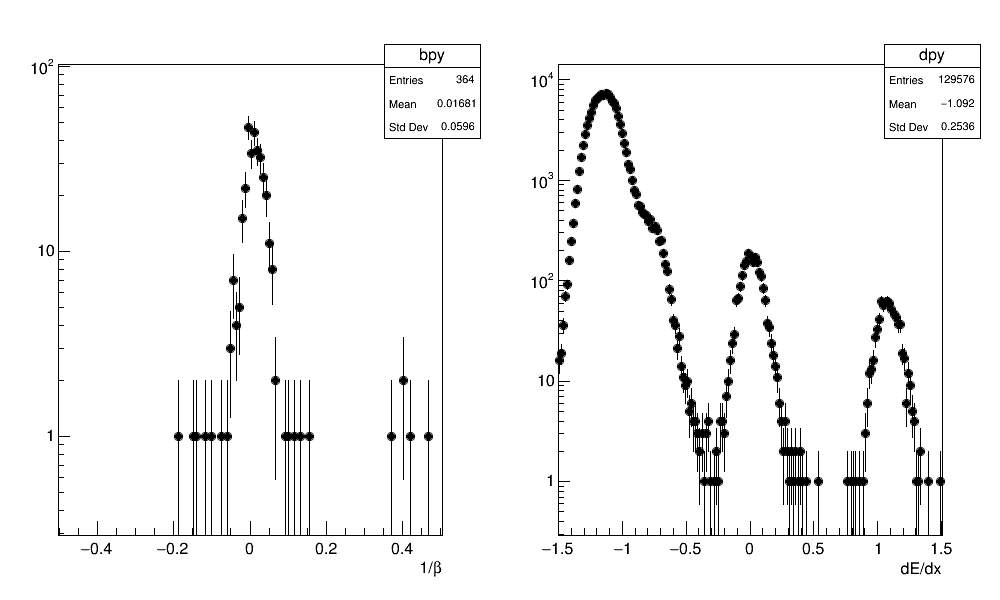

In [14]:
can.cd(1)
b = hBeta.GetXaxis().FindBin( 0.25 )
pBeta = hBeta.ProjectionY( "bpy", b, b )
pBeta.Draw()
pBeta.GetXaxis().SetRangeUser( -0.5, 0.5 )
R.gPad.SetLogy(1)

can.cd(2)
pDedx = hDedx.ProjectionY( "dpy", b, b )
pDedx.Draw()
pDedx.GetXaxis().SetRangeUser( -1.5, 1.5 )
R.gPad.SetLogy(1)

can